## 1.	Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.
Se agregan las librerias y funciones que se utilizarán

In [15]:
#Se ponen las librerias a utilizar a lo largo del reto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table

#Se crea una función que recibe el nombre del archivo y regresa un dataframe
def toDataFrame(archivo):
    return pd.read_csv(archivo)

## 2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv

In [3]:
#Se crea un dataframe con todos los países
happiness = toDataFrame('Happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## 3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [4]:
#Se crea un dataframe filtrando México
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index(['Country or region'], inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


## 4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(0.5, 1.0, 'World Happiness Report')

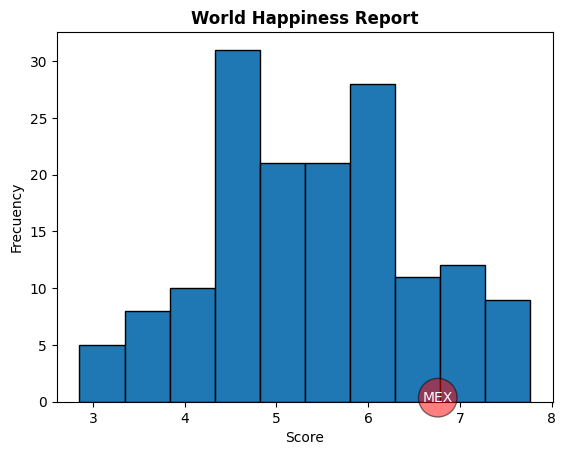

In [50]:
#Se ponen las propiedades del objeto a colocar
props_bbox = {
    'boxstyle': 'circle',
    'facecolor': 'red',
    'alpha': 0.5
}
#Se localiza el valor para México
value = float(mexico.iloc[0]['Score'])
#Se crea el histograma y se pone el texto para México
plt.hist(happiness['Score'], edgecolor='black')
plt.text(value, 0, 'MEX', color = 'white', bbox = props_bbox)
plt.xlabel('Score')
plt.ylabel('Frecuency')
plt.title('World Happiness Report', fontweight = "bold")

## 5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(0.5, 0, 'Healthy life expectancy')

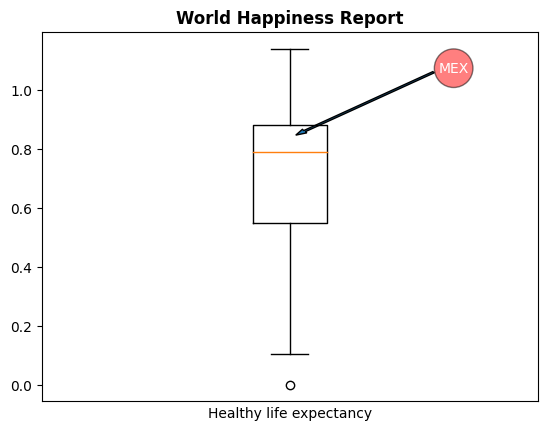

In [75]:
#Se ponen las propiedades del objeto a colocar
props_bbox = {
    'boxstyle': 'circle',
    'facecolor': 'red',
    'alpha': 0.5
}
#Se localiza el valor para México
value = float(mexico.iloc[0]['Healthy life expectancy'])
#Se coloca el texto un poco arriba para poner la flecha
plt.text(1.3, value+0.2, 'MEX', color = 'white', bbox = props_bbox)
#Se pone la flecha apuntando al valor aproximadamente
plt.arrow(1.29, value+0.2, -0.26, -0.2, width = 0.005)
#Se dibuja el boxplot
plt.boxplot(happiness['Healthy life expectancy'])
plt.title('World Happiness Report', fontweight = "bold")
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.xlabel('Healthy life expectancy')

## 6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México

Text(0.5, 1.0, 'Contribution in Mexico happiness score')

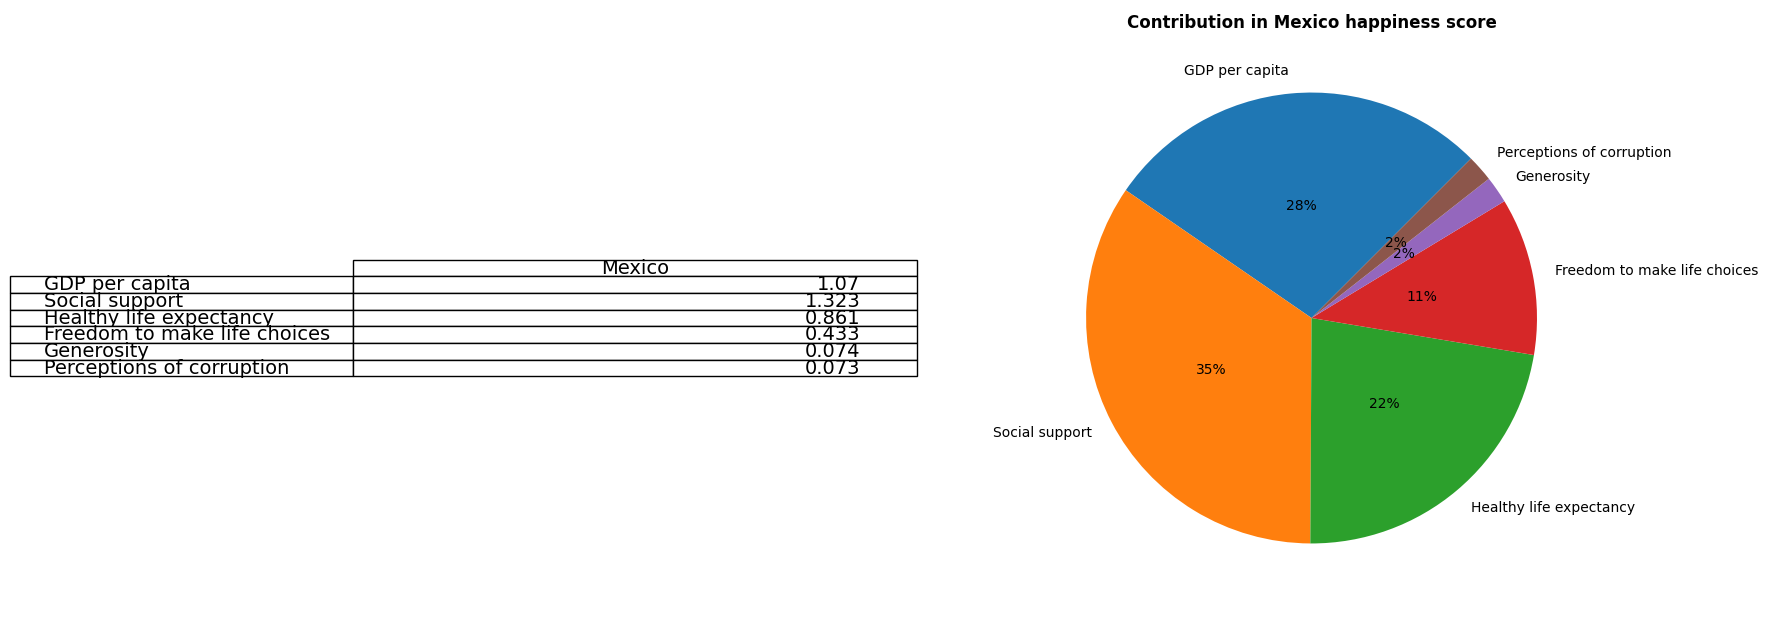

In [54]:
#Se filtran las variables a graficar
mexicoPie = mexico.loc[:,'GDP per capita':'Perceptions of corruption']

#Se crea una figura para poner la tabla y la gráfica
plt.figure(figsize=(16,8))
#Se agrega la tabla
ax1 = plt.subplot(121)
plt.axis('off')
tbl = table(ax1, mexicoPie.T, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)

#Se agrega la gráfica
ax2 = plt.subplot(122)
ax2.pie(mexicoPie.loc['Mexico'], autopct='%1.0f%%',
 startangle=45, shadow=False, labels=mexicoPie.columns,
 pctdistance=0.5)
plt.title('Contribution in Mexico happiness score', fontweight = "bold")

## 7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores

<Axes: title={'center': 'World Happiness Report'}>

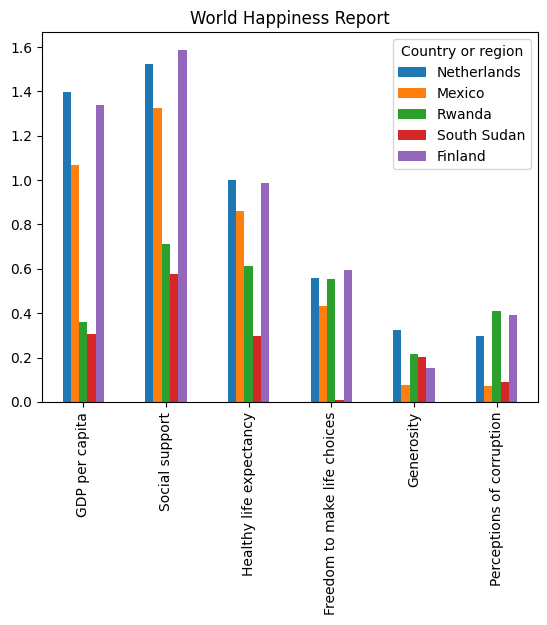

In [19]:
minInds = happiness["Score"].idxmin() #Se obtiene el índice del score más bajo
maxInds = happiness["Score"].idxmax() #Se obtiene el índice del score más alto
#Se obtienen los índices de los países de interés
filtro = happiness[(happiness['Country or region'] == 'Mexico') |
                     (happiness['Country or region'] == 'Rwanda') |
                     (happiness['Country or region'] == 'Netherlands')].index.to_list()
#Se agregan el más alto y el más bajo
filtro.append(minInds)
filtro.append(maxInds)

#Se filtran los países
paisesFiltrados = happiness.loc[filtro]
paisesFiltrados = paisesFiltrados[['Country or region','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
paisesFiltrados.set_index('Country or region', inplace = True)
#Se crean las graficas de barras
paisesFiltrados.T.plot(kind='bar', title = 'World Happiness Report')



## 8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

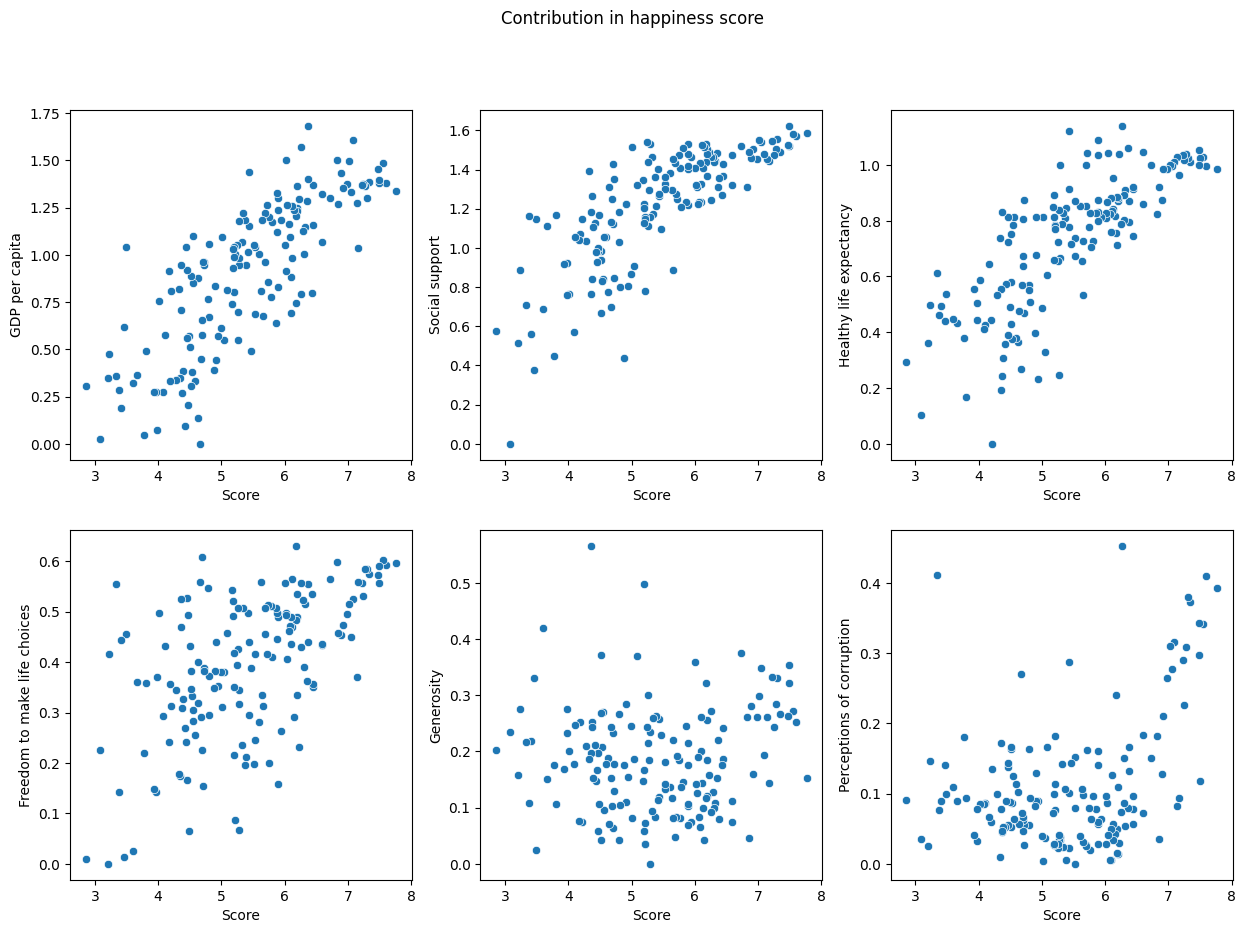

In [25]:
fig = plt.figure(figsize=(15,10)) #Se crea una figura para poner los scatters
fig.suptitle('Contribution in happiness score')
variables = happiness.columns.to_list() #Se obtienen las variables a graficar contra el Score

#Se quitan las columnas que no se van a usar
variables.remove('Overall rank')
variables.remove('Country or region')
variables.remove('Score')

for i in range(1,(len(variables)+1)):
  ax = fig.add_subplot(int('23'+str(i)))
  sns.scatterplot(data=happiness, x="Score", y=variables[i-1], ax=ax) #Se grafican una a una en el ciclo


## Comprueba lo anterior con un heatmap donde incluyas los índices de correlación

<Axes: >

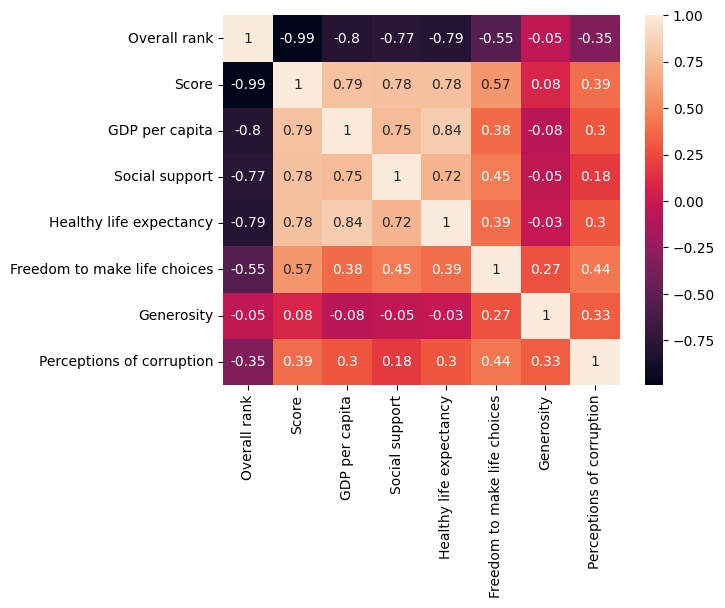

In [44]:
variables = happiness.columns.to_list() #Se obtienen las columnas para el mapa de calor
variables.remove('Country or region') #Se quita la columna Country or region que no se va a usar
matCorr = [] #Se inicializa la matriz
for i in range(0,len(variables)):
  matCorr.append([])
  for j in range(0,len(variables)):
    corr = round(happiness[variables[i]].corr(happiness[variables[j]]),2) #Se obtiene el coeficiente de correlación por variable y se redondea a dos decimales
    matCorr[i].append(corr)
datosCorr = pd.DataFrame(matCorr, index=variables, columns=variables) #Se crea un nuevo dataframe con la matriz y las variables como índices y columnas
sns.heatmap(datosCorr,annot=True) #Se genera el mapa de calor

## 9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

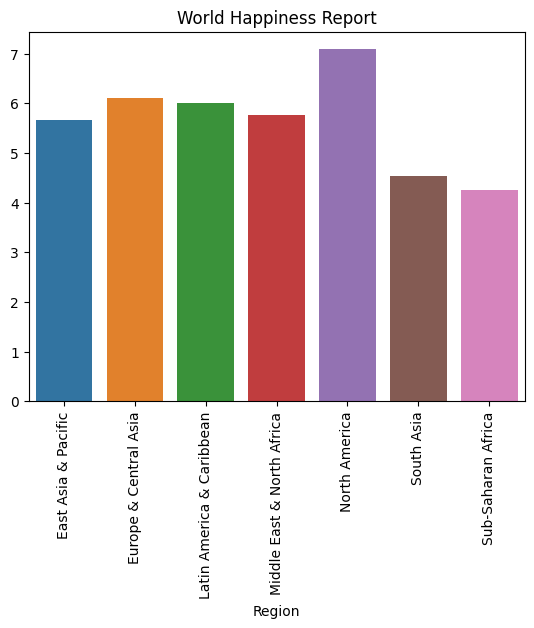

In [43]:
metadata = toDataFrame('Metadata.csv') #Se crea el dataframe de Metadata.csv
temp = happiness.set_index('Country or region').join(metadata.set_index('TableName')) #Se combinan las tablas usando Country or region y TableName
temp = temp[['Region', 'Score']].groupby('Region').mean() #Se agrupa por región y se obtiene el promedio
sns.barplot(temp.T).set(title = 'World Happiness Report') #Se hace la gráfica y se pone el título
plt.xticks(rotation=90) #Se ajustan las leyendas del eje X